In [1]:
#Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#load datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')


### Explore data sets

In [3]:
calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [6]:
listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [7]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [8]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [10]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

#### Convert date column data type to Datetime

In [11]:
calendar['date'] = pd.to_datetime(calendar['date'], format = "%Y-%m-%d")

In [12]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

### Converting Price data type to float

In [13]:
#write a function to convert from string to float
def float_price(x):
    if type(x) == str:
        x = x[1:].replace(",","")
        x = float(x)
    return x

In [14]:
calendar['price'] = calendar['price'].apply(lambda x: float_price(x))

In [15]:
listings['price'] = listings['price'].apply(lambda x: float_price(x))

In [16]:
listings['security_deposit'] = listings['security_deposit'].apply(lambda x: float_price(x))

In [17]:
calendar['date']

0         2016-01-04
1         2016-01-05
2         2016-01-06
3         2016-01-07
4         2016-01-08
             ...    
1393565   2016-12-29
1393566   2016-12-30
1393567   2016-12-31
1393568   2017-01-01
1393569   2017-01-02
Name: date, Length: 1393570, dtype: datetime64[ns]

In [18]:
calendar['day'] = calendar['date'].dt.day_name()

In [19]:
calendar['day_num'] = calendar['date'].dt.weekday

In [20]:
calendar['month'] = calendar['date'].dt.month_name()

In [21]:
listings['host_is_superhost'] = listings['host_is_superhost'].replace({'f':0, 't':1})

In [22]:
calendar

,listing_id,date,available,price,day,day_num,month
0,241032,2016-01-04,t,85.0,Monday,0,January
1,241032,2016-01-05,t,85.0,Tuesday,1,January
2,241032,2016-01-06,f,NaN,Wednesday,2,January
3,241032,2016-01-07,f,NaN,Thursday,3,January
4,241032,2016-01-08,f,NaN,Friday,4,January
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Thursday,3,December
1393566,10208623,2016-12-30,f,NaN,Friday,4,December
1393567,10208623,2016-12-31,f,NaN,Saturday,5,December
1393568,10208623,2017-01-01,f,NaN,Sunday,6,January


### How does prices differ among days of the week?

In [23]:
# create a function to help encode plot label
def label (x,y,z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    returns:
    None
    
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)

In [24]:
#choose the color of the bars I would use in the barplot
base_color = sns.color_palette()[0]

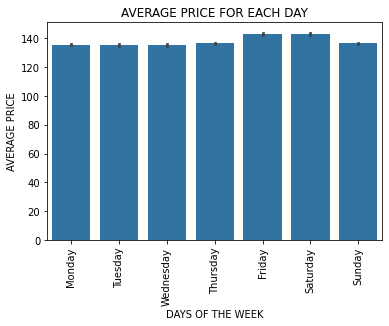

In [25]:
#Plot the bar chart
sns.barplot(data = calendar,x = 'day', y = 'price', color = base_color)
locs, labels = plt.xticks(rotation=90)
plt.savefig('week_day.png', dpi = 100,bbox_inches='tight')
label('DAYS OF THE WEEK','AVERAGE PRICE','AVERAGE PRICE FOR EACH DAY');

This shows that the price is fairly condatnt during the weekdays but 

### What room type has the highest price?


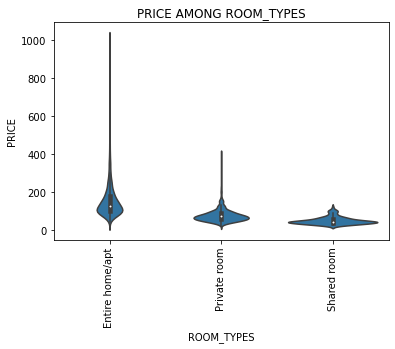

In [27]:
#Plot a violin plot for the room types against price
sns.violinplot(data= listings, x='room_type',y='price',  color = base_color)
plt.xticks(rotation = 90)
plt.savefig('violin.jpg', bbox_inches='tight')
label('ROOM_TYPES','PRICE', 'PRICE AMONG ROOM_TYPES')

There is a strong positive correlationship in the cases of the number of people the listing can contain (accommodates) and the bedrooms in a particular listing with a correlational coefficient of 0.65 and 0.63 respectively. There is also a positive correlation between price and the amount paid as security deposit. However, the is a negative correlationship between the reviews per month and the price.

In [ ]:
 model_var = listings[['price','host_is_superhost','accommodates','bedrooms', 'security_deposit','reviews_per_month']]

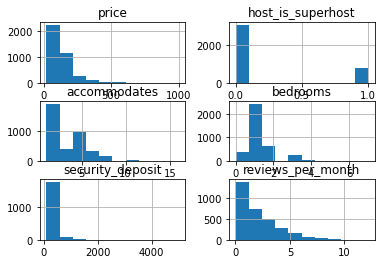

In [29]:
#Explore how the data in each column selected is distributed
model_var.hist();

### What factors affect the price of shortlets?

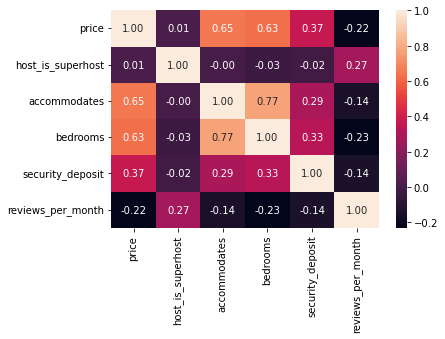

In [30]:
#Plot a  heatmap to see the relation between the different columns to determing price
sns.heatmap(model_var.corr(), annot=True, fmt=".2f")
plt.savefig('heatmap.jpg', bbox_inches='tight');

There is a strong positive correlationship in the cases of the number of people the listing can contain (accommodates) and the bedrooms in a particular listing with a correlational coefficient of 0.65 and 0.63 respectively. There is also a positive correlation between price and the amount paid as security deposit. However, the is a negative correlationship between the reviews per month and the price.

In [31]:
#Check for missing values
model_var.isnull().sum()

price                   0
host_is_superhost       2
accommodates            0
bedrooms                6
security_deposit     1952
reviews_per_month     627
dtype: int64

In [44]:
bed_mean = model_var['bedrooms'].mean()

In [45]:
#Replace missing valued of bedrooms with the mean
model_var['bedrooms'].fillna(1, inplace = True)

C:\Users\kyesu\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
model_var['bedrooms'].isnull().sum()

0

In [47]:
 model_var['reviews_per_month'].mean()

2.078918834221248

In [48]:
#Replace the missing values of reviews per month with the mean reviews
model_var['reviews_per_month'].fillna(2, inplace = True)

In [49]:
model_var['security_deposit'].fillna(0, inplace = True)

In [50]:
model_var.isnull().sum()

price                0
host_is_superhost    2
accommodates         0
bedrooms             0
security_deposit     0
reviews_per_month    0
dtype: int64

In [52]:
#Drop Nan rows
model_var.dropna(inplace = True)

C:\Users\kyesu\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
model_var.isnull().sum()

price                0
host_is_superhost    0
accommodates         0
bedrooms             0
security_deposit     0
reviews_per_month    0
dtype: int64

In [55]:
#Split into explanatory and response variables
X = model_var[['host_is_superhost','accommodates','bedrooms', 'security_deposit','reviews_per_month']]
y = model_var['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.5225975411597221 on 1145 values.'

From the above it is evident that 52% of the independent determines the variability of the Price of the shortlets

In [56]:
model_var['intercept'] = 1

C:\Users\kyesu\AppData\Local\Temp/ipykernel_26244/32823407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_var['intercept'] = 1
